       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
0    1/1/1985
1    2/1/1985
2    3/1/1985
3    4/1/1985
4    5/1/1985
Name: DATE, dtype: object
0


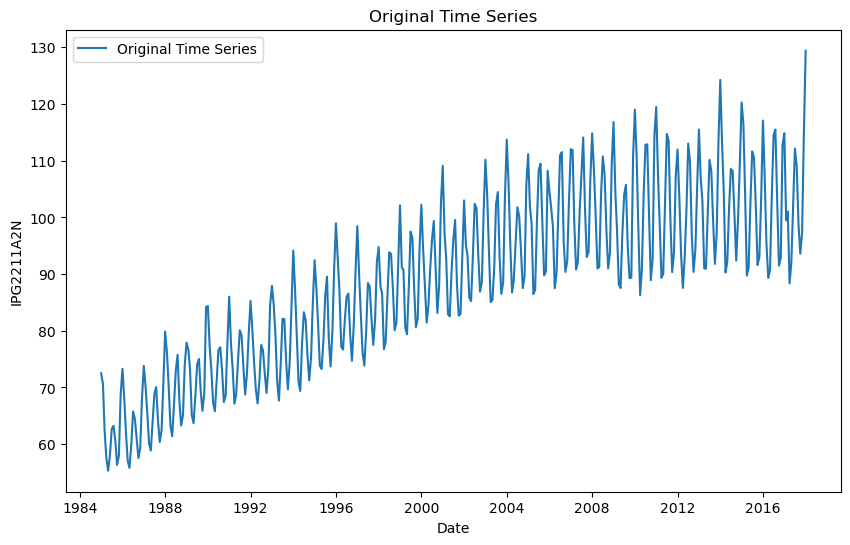

ADF Test p-value before transformation: 0.18621469116586814


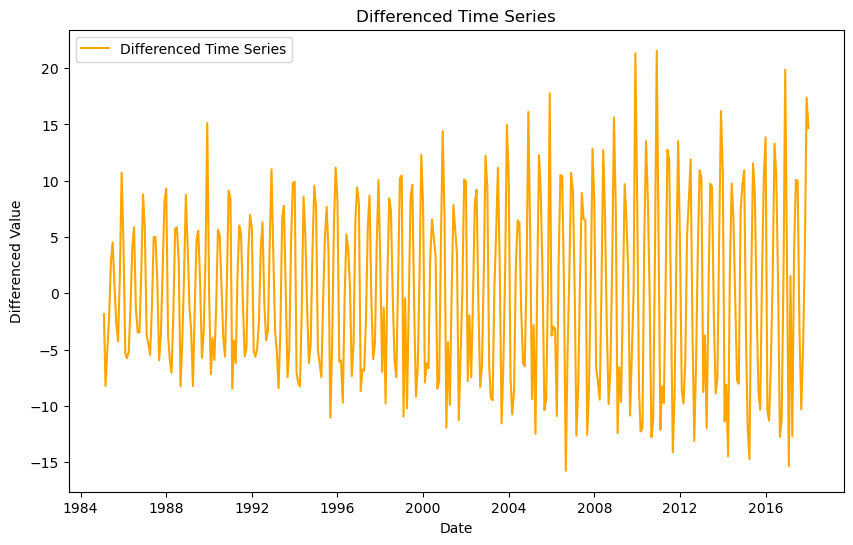

ADF Test p-value after transformation: 4.0777865655383114e-10
The original time series is non-stationary.
The transformed time series is stationary.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset (update this with your file path)
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\exp4\Electric_Production.csv")

# Display the first few rows to understand the structure
print(df.head())

# Check the format of the 'DATE' column
print(df['DATE'].head())  # Inspect the date values

# Try converting the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # Automatically handle errors

# Check for missing or invalid date values after conversion
print(df['DATE'].isnull().sum())  # Check for any missing or invalid dates

# Drop any rows with invalid 'DATE' values (if any)
df = df.dropna(subset=['DATE'])

# Set 'DATE' as the index
df.set_index('DATE', inplace=True)

# Function to perform the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    return result[1]  # p-value

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['IPG2211A2N'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('IPG2211A2N')
plt.legend()
plt.show()

# Perform ADF test on the original series
p_value_before = adf_test(df['IPG2211A2N'])
print(f"ADF Test p-value before transformation: {p_value_before}")

# Difference the series to make it stationary
df_diff = df['IPG2211A2N'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df_diff.index, df_diff, label='Differenced Time Series', color='orange')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

# Perform ADF test on differenced series
p_value_after = adf_test(df_diff)
print(f"ADF Test p-value after transformation: {p_value_after}")

# Interpretation of p-values
if p_value_before < 0.05:
    print("The original time series is stationary.")
else:
    print("The original time series is non-stationary.")

if p_value_after < 0.05:
    print("The transformed time series is stationary.")
else:
    print("The transformed time series is still non-stationary.")
